## Resume Classification


###**Intial Step** : **Text Extraction**

## 1. Import Library

In [1]:
!pip install textract==1.6.3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.6/111.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 5.3 MB/s eta 0:00:0

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
os.listdir('/content/drive/MyDrive/Resume_Dataset/')

['React JS Developer',
 'Peoplesoft resumes',
 'SQL Developer Lightning insight',
 'workday resumes']

## 2. Exctract the Text from Dataset

In [5]:
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Resume_Dataset/Peoplesoft resumes/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [6]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
2,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
5,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
6,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
8,Classification: Internal\n\nClassification: In...,PeopleSoft
9,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft


In [7]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Resume_Dataset/React JS Developer/'
for i in os.listdir(directory2):
    if i.endswith(('.docx','.pdf')):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [8]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
1,\n\n \n\n \n\nName: M. Prabakaran \nTitle: UI...,React JS Developer
2,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
3,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer
7,Name: Ravali P \n\n\n\n ...,React JS Developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
9,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer


In [9]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Resume_Dataset/SQL Developer Lightning insight/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [10]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
1,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
2,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,BUDDHA VAMSI ...,SQL Developer
7,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
8,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
9,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer


In [11]:
file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Resume_Dataset/workday resumes/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [12]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Name : Gopi Krishna Reddy\n\n\t\t ...,Workday
1,Vinay kumar .v\nWorkday Functional Consultant\...,Workday
2,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
3,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
4,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
5,Workday HCM Techno functional Consultant ...,Workday
6,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
7,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
8,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
9,G Himaja\n\n ...,Workday


## 3. Create a DataFrame

In [13]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
2,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
3,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
5,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
6,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
8,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
9,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN


In [14]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  53 non-null     object
 1   Category1    10 non-null     object
 2   Category2    21 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


### 3.1 Merge all Unnecessary column in One Column

In [15]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft


In [16]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

### 3.2 Final Dataset

In [17]:
#Final Dataset
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
1,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
2,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
5,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
6,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
7,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
8,PeopleSoft,Classification: Internal\n\nClassification: In...
9,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."


In [18]:
resume_data["Raw_Details"][4]

"PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCareer Objective:\n\n\n\nI have total 4.2 Years’ Experience in PeopleSoft Admin and PeopleSoft DBA. I hope to enhance my skill set while adding value to the business, to enable implementation of solutions, which aid the company’s objectives, understanding and anticipating the needs, interests and motivations of the clients and to deliver on time, budget and to quality, delivering value through improving agility, quality and reliability\n\n\n\nProfessional Summary:\n\n\n\n\tHaving 4.2 years of experience in PeopleSoft implementation, Support, People Tools Upgrades, configuration, migrations, maintenance and administration of Application Server Domains, Process Scheduler Servers, Web Server Domains, PUM and Elastic search.\n\n\tInvolved in various Tools and Application Upgrades.\n\n\tExperience in driving Infrastructure Hardware Upgrades, Disaster Recovery Activities.\n\n\tConfigured https and secure web server (SSL) administration.\n\n\tMonitor 

### 3.3 Save new CSV File

In [19]:
#New Resume data
resume_data.to_csv('Raw_Resume.csv', index=False)
#Download
from google.colab import files
files.download('Raw_Resume.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4. Data Understanding

In [20]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
1,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
2,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
5,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
6,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
7,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
8,PeopleSoft,Classification: Internal\n\nClassification: In...
9,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."


In [21]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
42,Workday,Name : Gopi Krishna Reddy\n\n\t\t ...
43,Workday,Vinay kumar .v\nWorkday Functional Consultant\...
44,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
45,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
46,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
47,Workday,Workday HCM Techno functional Consultant ...
48,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
49,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
50,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
51,Workday,G Himaja\n\n ...


In [22]:
resume_data.isnull().sum()

,0
Category,0
Raw_Details,0


### 4.1 Number of Words in each Resume

In [23]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363
2,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433
3,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918


### 4.2 Number of Characters

In [24]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,3577
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,2852
2,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,3669
3,PeopleSoft Administration\n\n \n\nVivekanand S...,16112
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943


### 4.3 Number of Stopwords

In [25]:
nltk.download('stopwords')
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Raw_Details,Stopwords
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,136
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,98
2,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84
3,PeopleSoft Administration\n\n \n\nVivekanand S...,520
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225


### 4.4 Number of Numerics

In [26]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,3
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,4
2,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,13
3,PeopleSoft Administration\n\n \n\nVivekanand S...,17
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4


In [27]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3
1,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
2,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
5,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
6,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
7,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
8,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
9,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15


## 5. Text Pre-Processing

### 5.1 Using Regular Expression

In [28]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [29]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### 5.2 Clean Text from Resume

In [30]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
1,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
2,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
6,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
7,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
8,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
9,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...


### 5.3 Save the Clean Data in new CSV File

In [31]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,priyabrata hota career objective pursuing peop...
1,PeopleSoft,tanna sujatha objective seeking challenging ro...
2,PeopleSoft,murali professional summary years experience p...
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,address manyata tech park nagavara bangalore l...
6,PeopleSoft,anubhav kumar singh core competencies scriptin...
7,PeopleSoft,hari narayana professional summary years exper...
8,PeopleSoft,classification internal classification interna...
9,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...


In [32]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [33]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data
#Download
from google.colab import files
files.download('Cleaned_Resumes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
resume_data.Resume_Details[5]

'address manyata tech park nagavara bangalore linin subha santosh peoplesoft finance fscm ariba java full stack development sql power learning new technologies planting hybrid species cooking travelling singing time management responsible deliverables leadership qualities japanese french started learning sri subha santosh kumar josyula years experience assistance development projects like ariba peoplesoft finance successfully completed tools patch tools upgrade project refuse validations main point contact non regression testing user acceptance testing responsible find solutions makes customer satisfaction associate consultant capgemini axa june till date working modules like accounts payable accounts receivable general ledger expenses user profile self service uss security along application designer sql server organised customer information account data business planning customer service purposes received positive customer survey results worked people code packaging activities success

## 6. Named Entity Recognition (NER)

In [35]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [36]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 334), ('using', 259), ('workday', 232), ('sql', 213), ('application', 209), ('project', 192), ('server', 188), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 137), ('react', 135), ('process', 123), ('skills', 120), ('system', 117), ('client', 109), ('good', 108), ('tools', 102), ('involved', 102), ('working', 101), ('developer', 99), ('database', 99), ('creating', 97), ('like', 97), ('various', 97), ('support', 94), ('hcm', 94), ('development', 94), ('worked', 93), ('integrations', 92), ('technical', 89), ('services', 89), ('integration', 87), ('servers', 86), ('report', 83), ('html', 83), ('people', 81), ('created', 81), ('design', 81), ('role', 80), ('team', 78), ('used', 77), ('responsibilities', 72), ('studio', 72), ('professional', 71), ('work', 71), ('css', 71), ('eib', 71)]


## 7. Parts Of Speech (POS) Tagging

In [37]:
!python -m spacy download en_core_web_lg # Download the en_core_web_lg model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [38]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [39]:
for token in doc_block[:30]:
    print(token,token.pos_)

te PROPN
new PROPN
origin NOUN
admin NOUN
requisition NOUN
raise VERB
origin NOUN
admin NOUN
purpose NOUN
get VERB
requisition NOUN
approval NOUN
flow NOUN
admin NOUN
created VERB
origin NOUN
admin PROPN
add VERB
origin NOUN
route PROPN
control PROPN
profile NOUN
help VERB
people NOUN
tools NOUN
route PROPN
control NOUN
profile NOUN
added VERB
approver ADP


### 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [40]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['objective', 'pursuing', 'role', 'experience', 'years', 'supply', 'chain', 'management', 'processes', 'include', 'modification', 'testing', 'supporting', 'modules', 'skill', 'purchasing', 'inventory', 'billing', 'sound', 'knowledge', 'account', 'sound', 'knowledge', 'security', 'query', 'knowledge', 'security', 'application', 'designer', 'tools', 'people', 'tools', 'database', 'summary', 'project', 'module', 'accounts', 'payables', 'client', 'accounts', 'team', 'role', 'developer', 'technologies', 'used', 'crystal', 'reports', 'people', 'tools', 'application', 'designer', 'reporting', 'tools', 'application', 'designer', 'using', 'tool', 'created', 'page', 'contains', 'run', 'control', 'record', 'page', 'add', 'component', 'register', 'component', 'reflected', 'internet', 'architecture', 'people', 'tools', 'created', 'permission', 'list', 'help', 'people', 'tools', 'permission', 'list', 'role', 'selected', 'user', 'access', 'page', 'created', 'process', 'run', 'crystal', 'tools', 'outp

### 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [41]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,302
1,using,249
2,application,208
3,workday,192
4,project,174
5,reports,170
6,data,170
7,business,158
8,web,140
9,react,135


### 7.3 Visualizing the Result of Top 25 Nouns and Verbs most Frequently


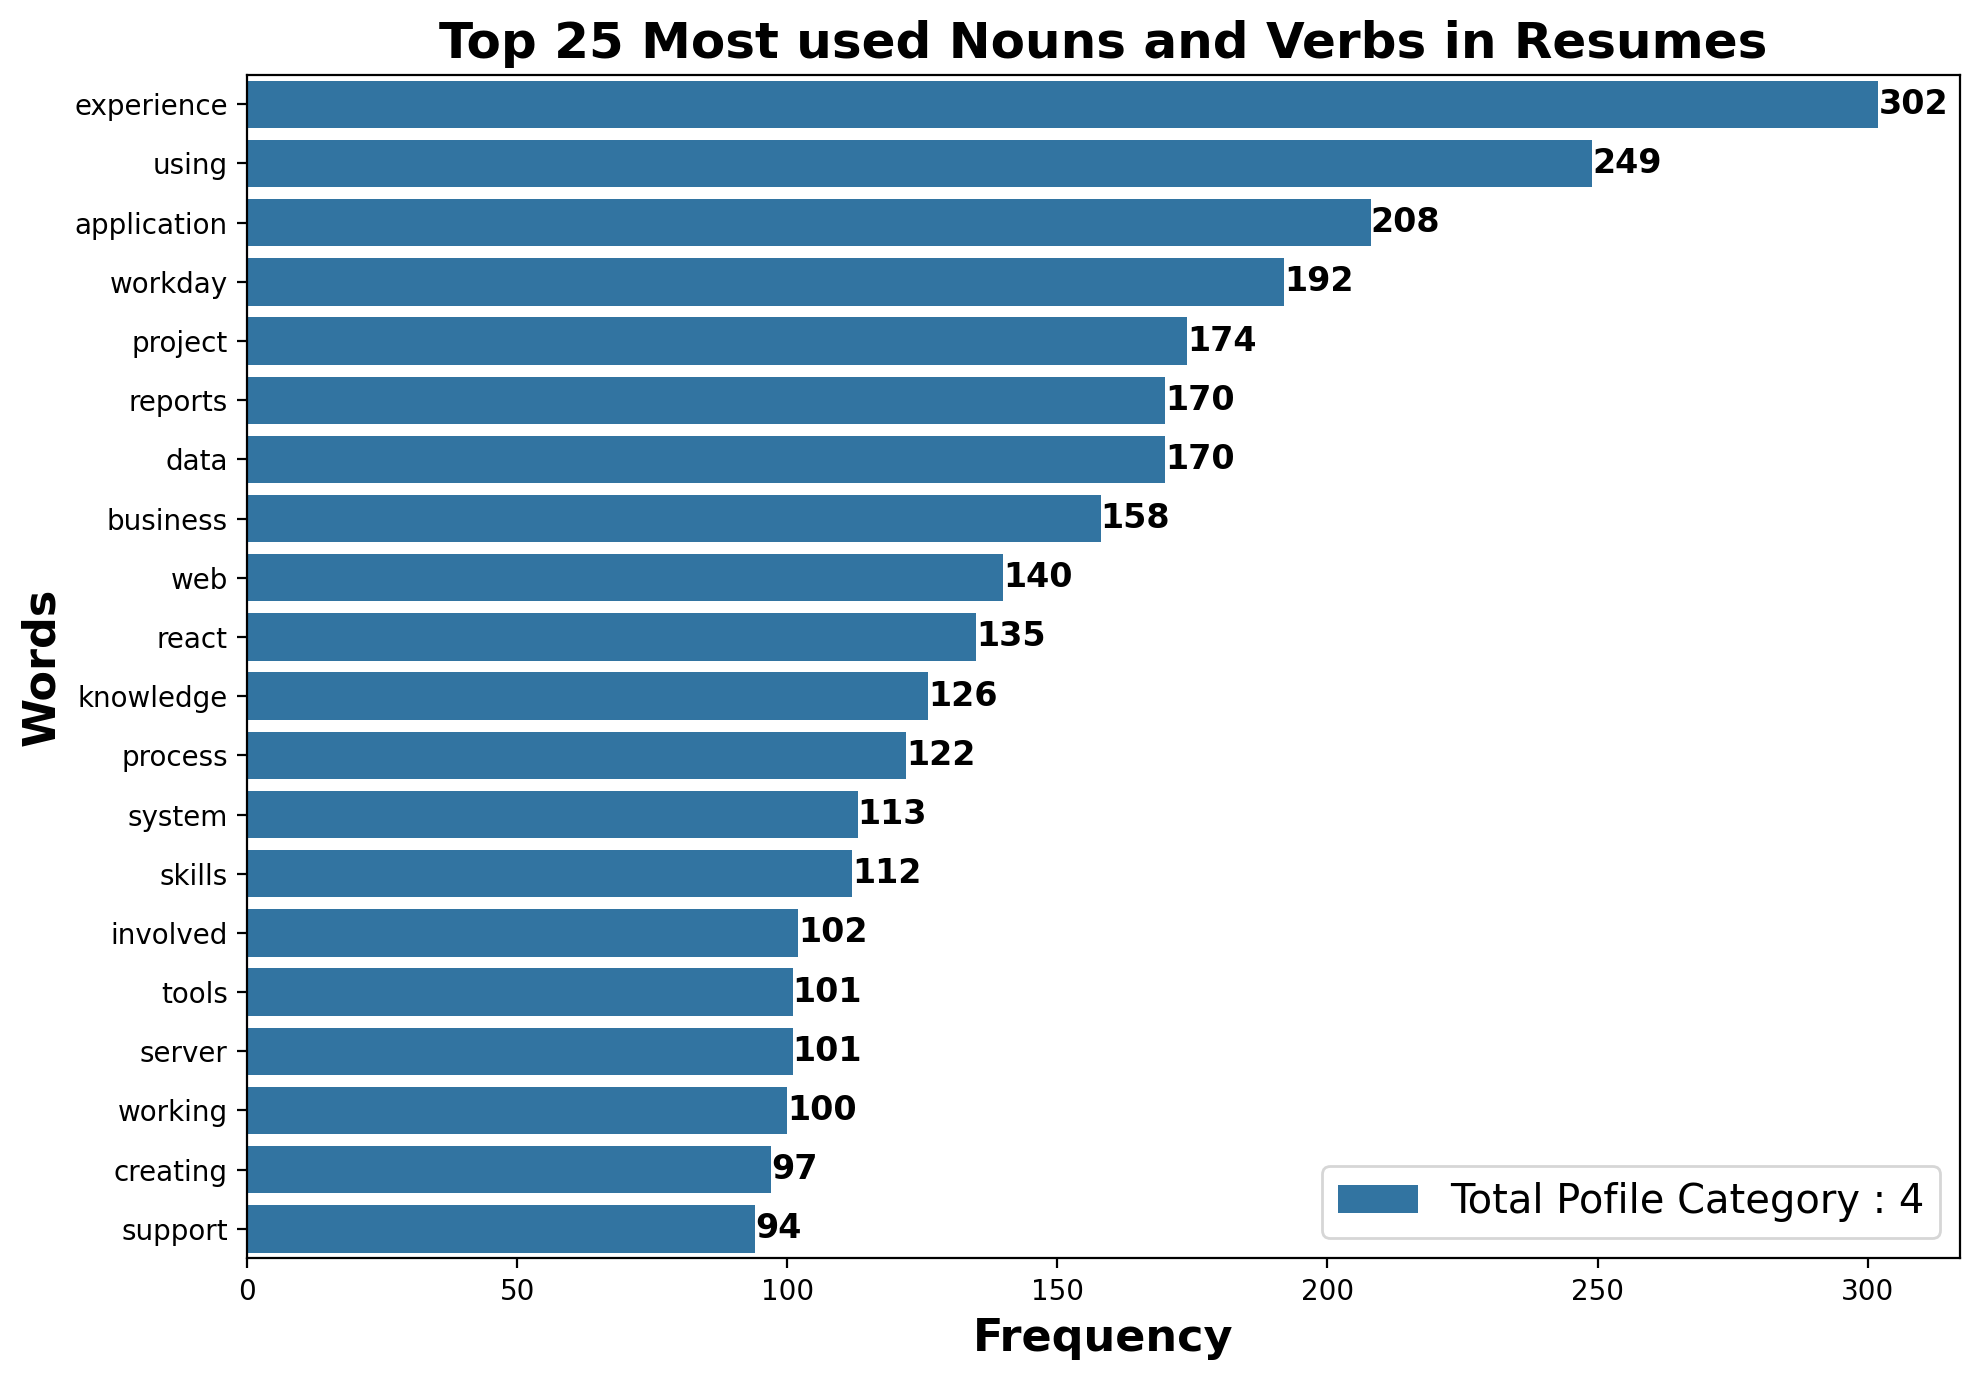

In [42]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'10','ytick.labelsize':'10','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

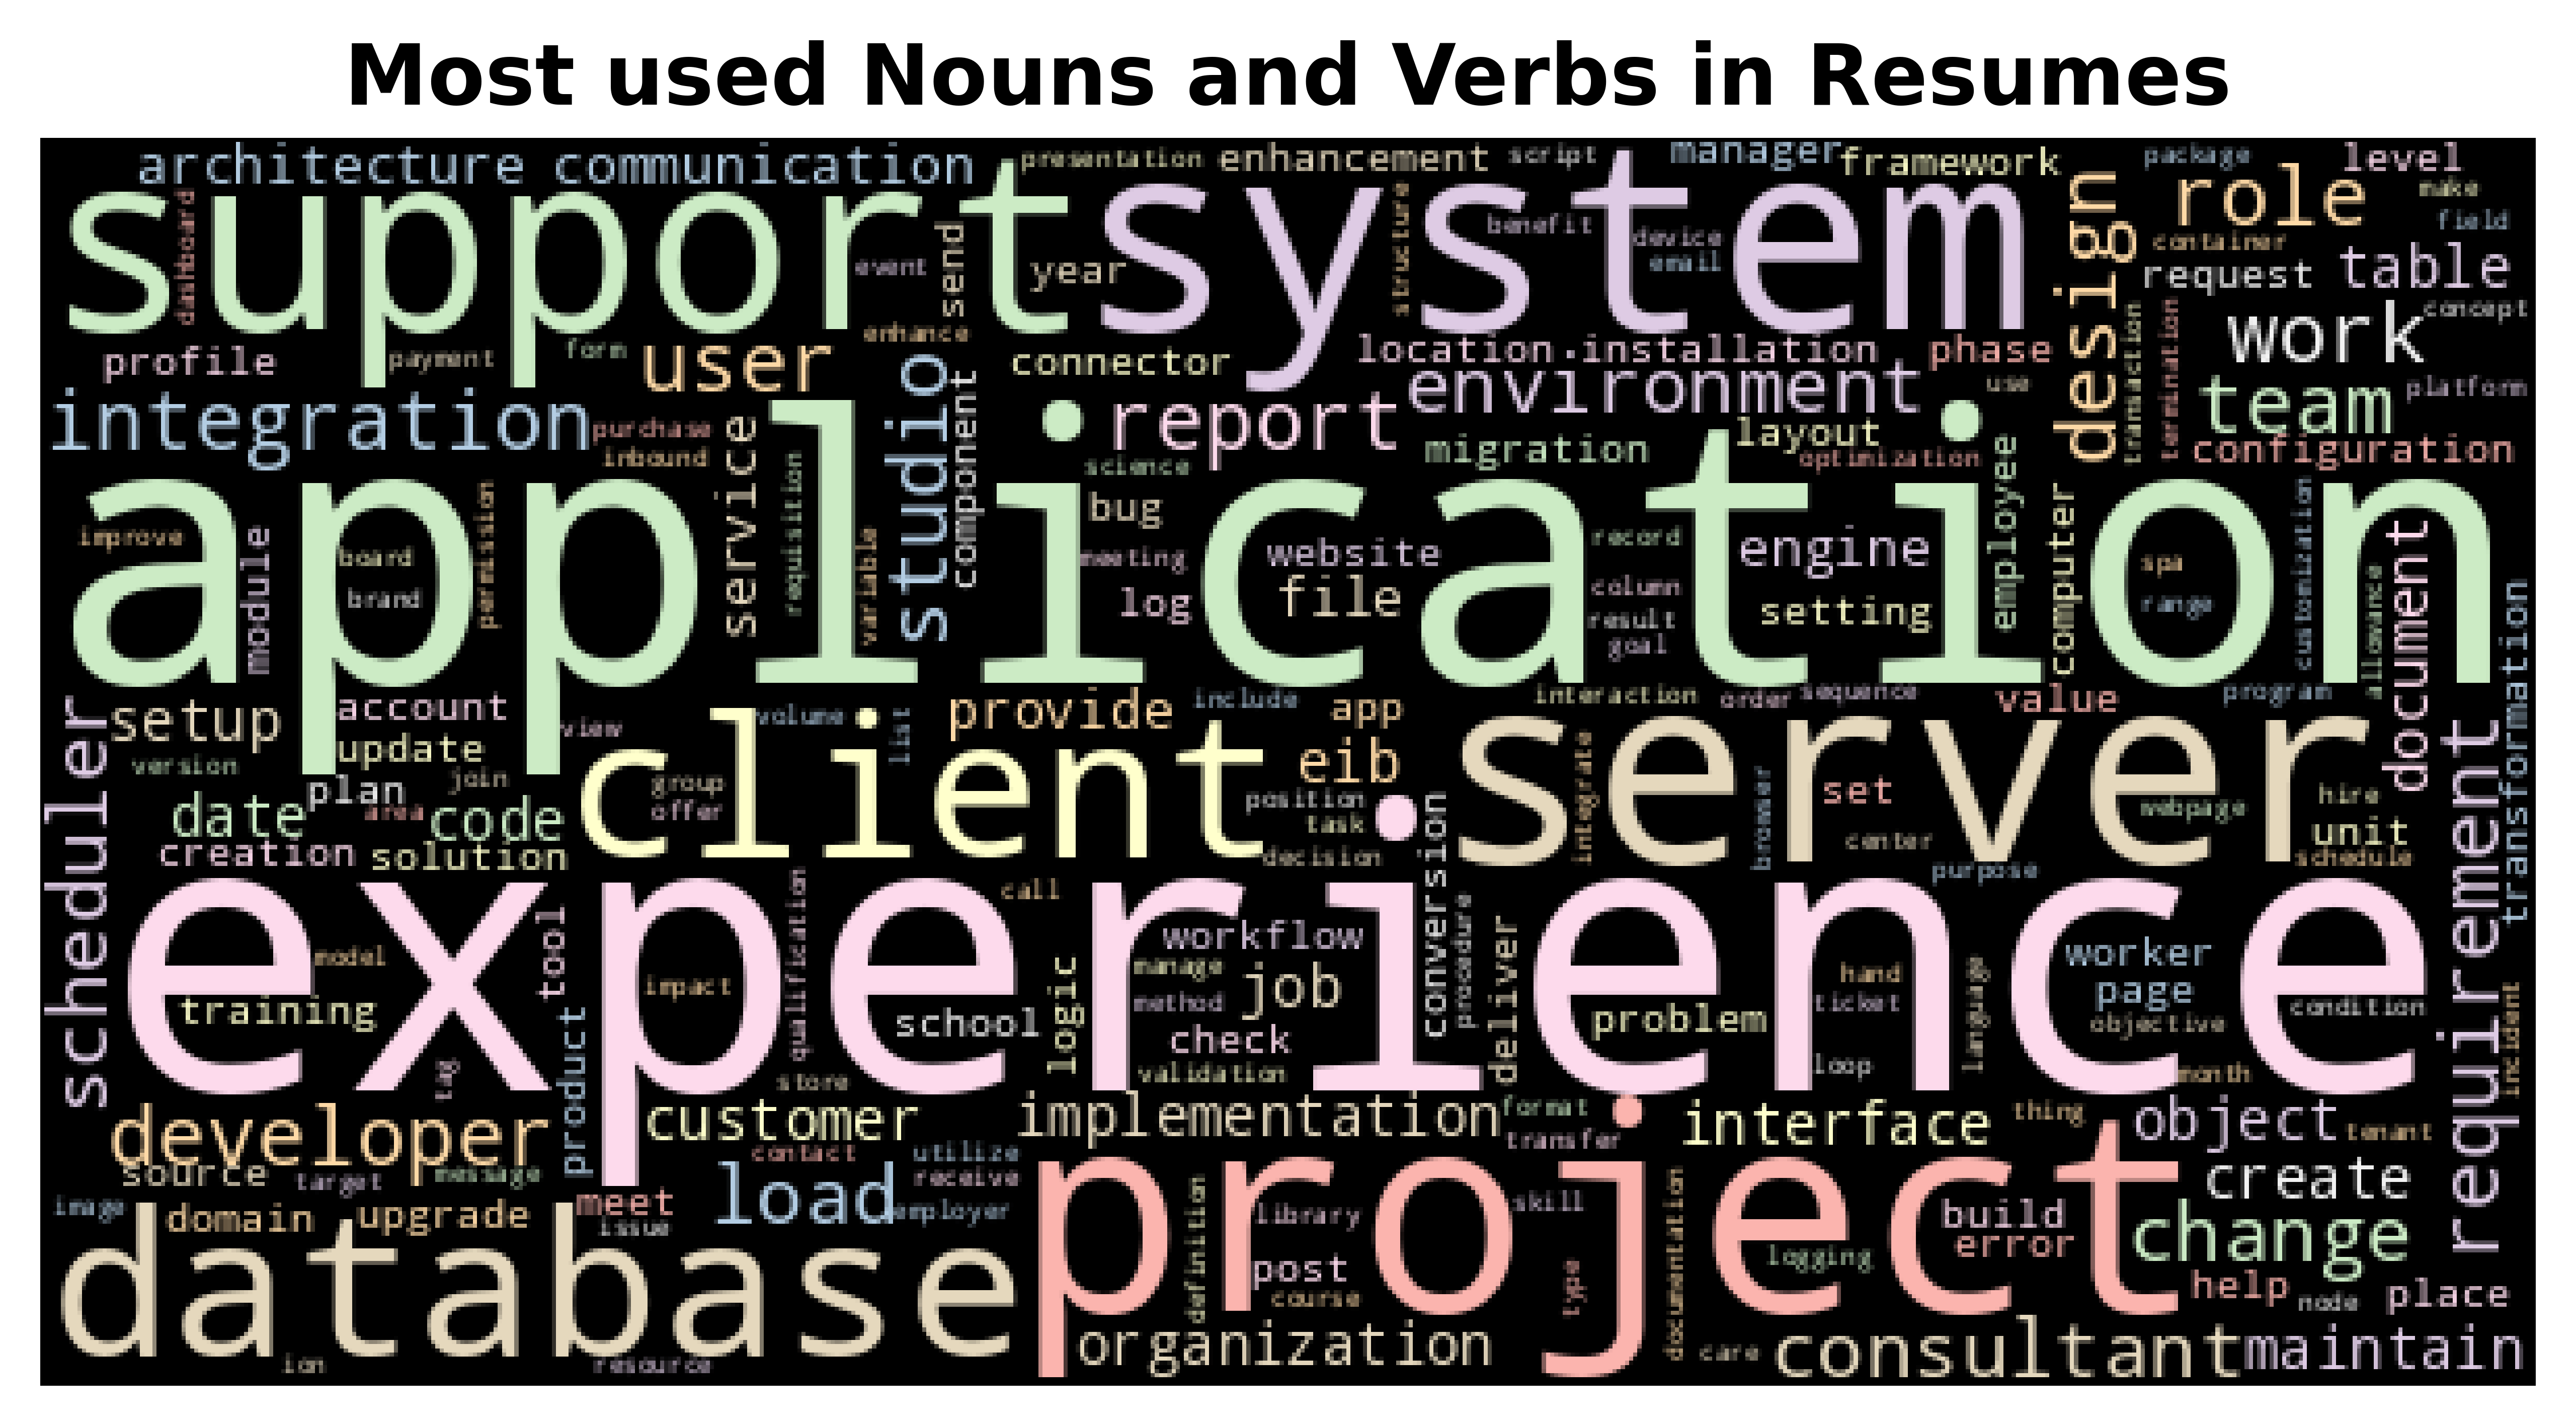

In [43]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=600, height=300, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(8,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#                                                          Done By Vamc_Yadav!!!

# **EDA**

# 1. Import Library

In [44]:
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# 2. About Dataset

In [45]:
file_path   = '/content/drive/MyDrive/Resume_Dataset/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [46]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 2 
Number of .docx Files = 52


In [47]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  80


# 2.1 Type of File Format

In [48]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

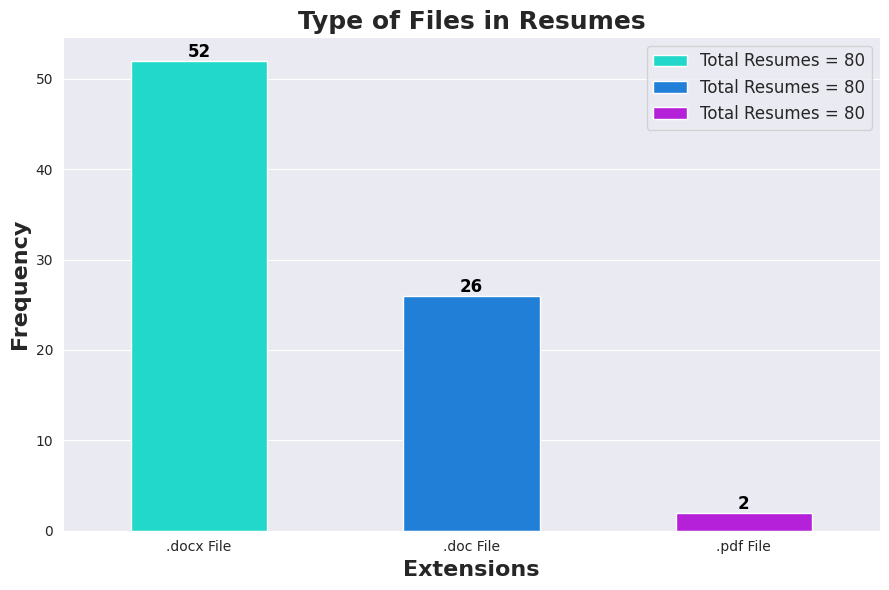

In [49]:
# Type of Files in Resumes

colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03']
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)),palette=colors)

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

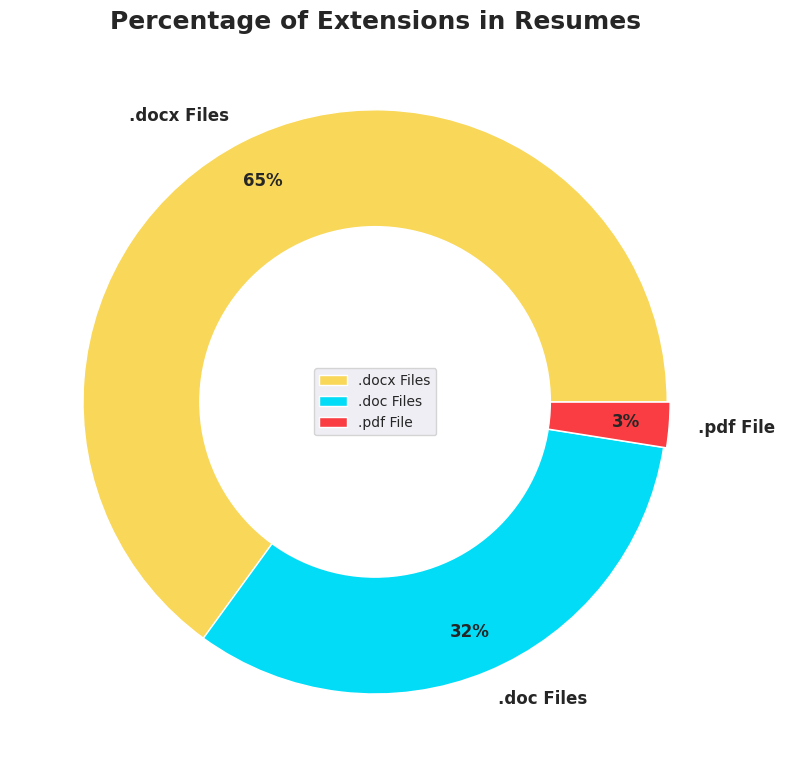

In [50]:
# Percentage of Extensions in Resumes

fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# 3. Extract Resumes by Profile Category

In [51]:
file_path = '/content/drive/MyDrive/Resume_Dataset/'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [52]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,React JS Developer,React Developer_Haripriya.docx
1,React JS Developer,Reactjs Developer_Prabakaran_Musquare Technolo...
2,React JS Developer,React Dev_Krishna Kanth.docx
3,React JS Developer,React Developer_Kamalakar Reddy.docx
4,React JS Developer,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...
...,...,...
75,workday resumes,Himaja G_(Hexaware).docx
76,workday resumes,Jyotiverma_Heaware.docx
77,workday resumes,Harikrishna Akula_Hexaware.doc
78,workday resumes,Hari Krishna M_Hexaware.doc


In [53]:
resume_data.Profile.value_counts().index

Index(['React JS Developer', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object', name='Profile')

In [54]:
resume_data.Profile.value_counts()

,count
Profile,
React JS Developer,24
workday resumes,22
Peoplesoft resumes,20
SQL Developer Lightning insight,14


# 3.1 Number of Total Resumes


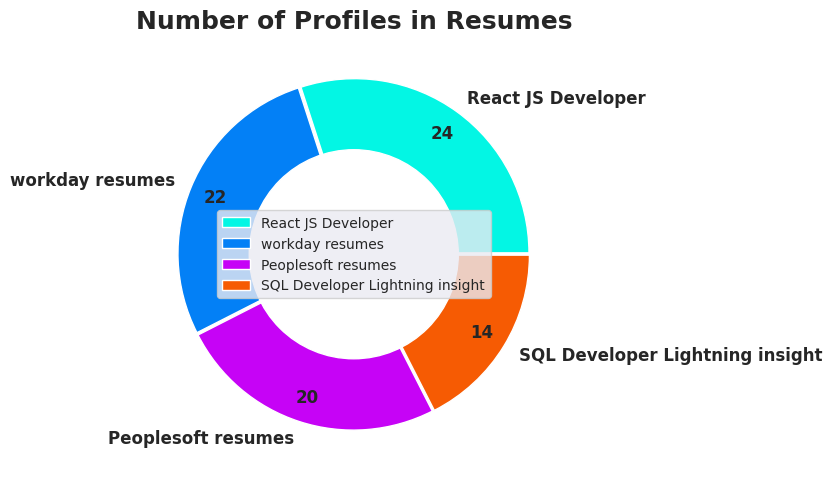

In [55]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
os.makedirs('IMG', exist_ok=True)

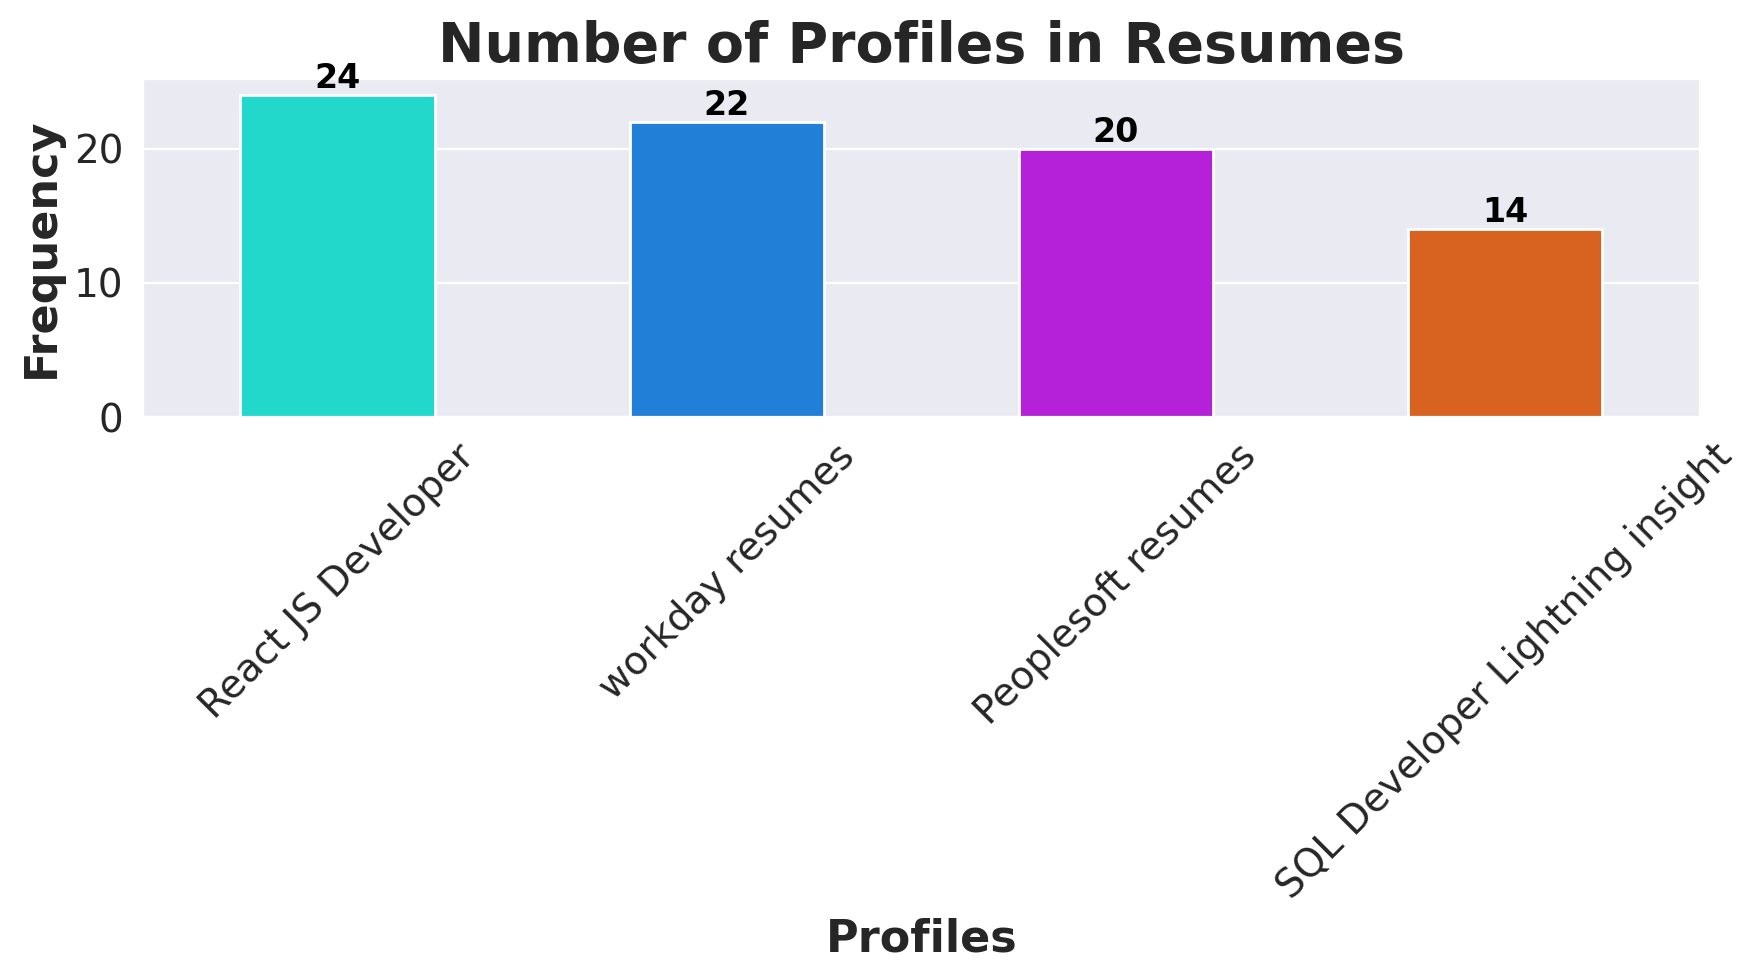

In [56]:
# Number of Profiles in Resumes

fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)

# Calculate value counts and store in a variable
profile_counts = resume_data.Profile.value_counts()

# Define a list of colors
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03']


# Use the index and values of profile_counts for plotting
ax = sns.barplot(x=profile_counts.index, y=profile_counts.values, width=0.5,
                 ax=axe, label=f'Total Profile Category: {len(resume_data.Profile.unique())}',palette=colors)

axe.set_xlabel('Profiles', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=45)
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

for i in ax.containers:
    ax.bar_label(i, color='black', fontweight='bold', fontsize=12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

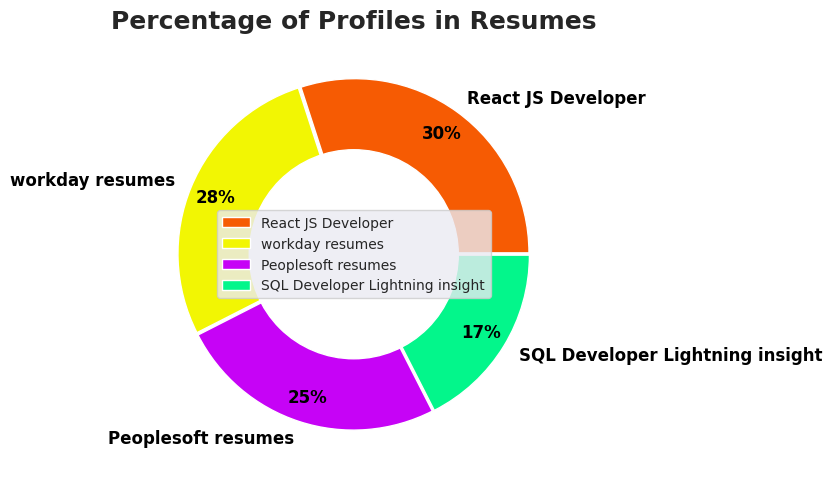

In [57]:
# Percentage of Profiles Category

fig = plt.figure(figsize=(8,8),dpi=100)

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode,
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# 4. Reading a Resume File


In [58]:
import docx2txt

In [59]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

print(extract_text_from_docx('/content/drive/MyDrive/Resume_Dataset/React JS Developer/React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

# 5. Data Exploration


In [60]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,priyabrata hota career objective pursuing peop...
1,PeopleSoft,tanna sujatha objective seeking challenging ro...
2,PeopleSoft,murali professional summary years experience p...
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,address manyata tech park nagavara bangalore l...
6,PeopleSoft,anubhav kumar singh core competencies scriptin...
7,PeopleSoft,hari narayana professional summary years exper...
8,PeopleSoft,classification internal classification interna...
9,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...


# 5.1 N-grams



1.   N-grams analyses are often used to see which words often show up together.





In [61]:
!pip install textblob
from textblob import TextBlob

In [62]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['tanna']),
 WordList(['sujatha']),
 WordList(['objective']),
 WordList(['seeking']),
 WordList(['challenging']),
 WordList(['role']),
 WordList(['area']),
 WordList(['work']),
 WordList(['organization']),
 WordList(['utilize']),
 WordList(['functional']),
 WordList(['knowledge']),
 WordList(['provide']),
 WordList(['best']),
 WordList(['solutions']),
 WordList(['business']),
 WordList(['professional']),
 WordList(['summary']),
 WordList(['functional']),
 WordList(['expertise'])]

In [63]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['tanna', 'sujatha']),
 WordList(['sujatha', 'objective']),
 WordList(['objective', 'seeking']),
 WordList(['seeking', 'challenging']),
 WordList(['challenging', 'role']),
 WordList(['role', 'area']),
 WordList(['area', 'work']),
 WordList(['work', 'organization']),
 WordList(['organization', 'utilize']),
 WordList(['utilize', 'functional']),
 WordList(['functional', 'knowledge']),
 WordList(['knowledge', 'provide']),
 WordList(['provide', 'best']),
 WordList(['best', 'solutions']),
 WordList(['solutions', 'business']),
 WordList(['business', 'professional']),
 WordList(['professional', 'summary']),
 WordList(['summary', 'functional']),
 WordList(['functional', 'expertise']),
 WordList(['expertise', 'peoplesoft'])]

In [64]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['tanna', 'sujatha', 'objective']),
 WordList(['sujatha', 'objective', 'seeking']),
 WordList(['objective', 'seeking', 'challenging']),
 WordList(['seeking', 'challenging', 'role']),
 WordList(['challenging', 'role', 'area']),
 WordList(['role', 'area', 'work']),
 WordList(['area', 'work', 'organization']),
 WordList(['work', 'organization', 'utilize']),
 WordList(['organization', 'utilize', 'functional']),
 WordList(['utilize', 'functional', 'knowledge']),
 WordList(['functional', 'knowledge', 'provide']),
 WordList(['knowledge', 'provide', 'best']),
 WordList(['provide', 'best', 'solutions']),
 WordList(['best', 'solutions', 'business']),
 WordList(['solutions', 'business', 'professional']),
 WordList(['business', 'professional', 'summary']),
 WordList(['professional', 'summary', 'functional']),
 WordList(['summary', 'functional', 'expertise']),
 WordList(['functional', 'expertise', 'peoplesoft']),
 WordList(['expertise', 'peoplesoft', 'finance'])]

In [65]:
resume_data['Resume_Details']

,Resume_Details
0,priyabrata hota career objective pursuing peop...
1,tanna sujatha objective seeking challenging ro...
2,murali professional summary years experience p...
3,peoplesoft administration vivekanand sayana ca...
4,peoplesoft admin varkala vikas career objectiv...
5,address manyata tech park nagavara bangalore l...
6,anubhav kumar singh core competencies scriptin...
7,hari narayana professional summary years exper...
8,classification internal classification interna...
9,sirazuddin bangalore india sirazuddin bangalor...


# 5.2 Top 20 most used words in Resumes



1.   Using CountVectorizer




In [66]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [67]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,334,experience
1,259,using
2,232,workday
3,213,sql
4,209,application
5,192,project
6,188,server
7,180,data
8,170,reports
9,169,peoplesoft


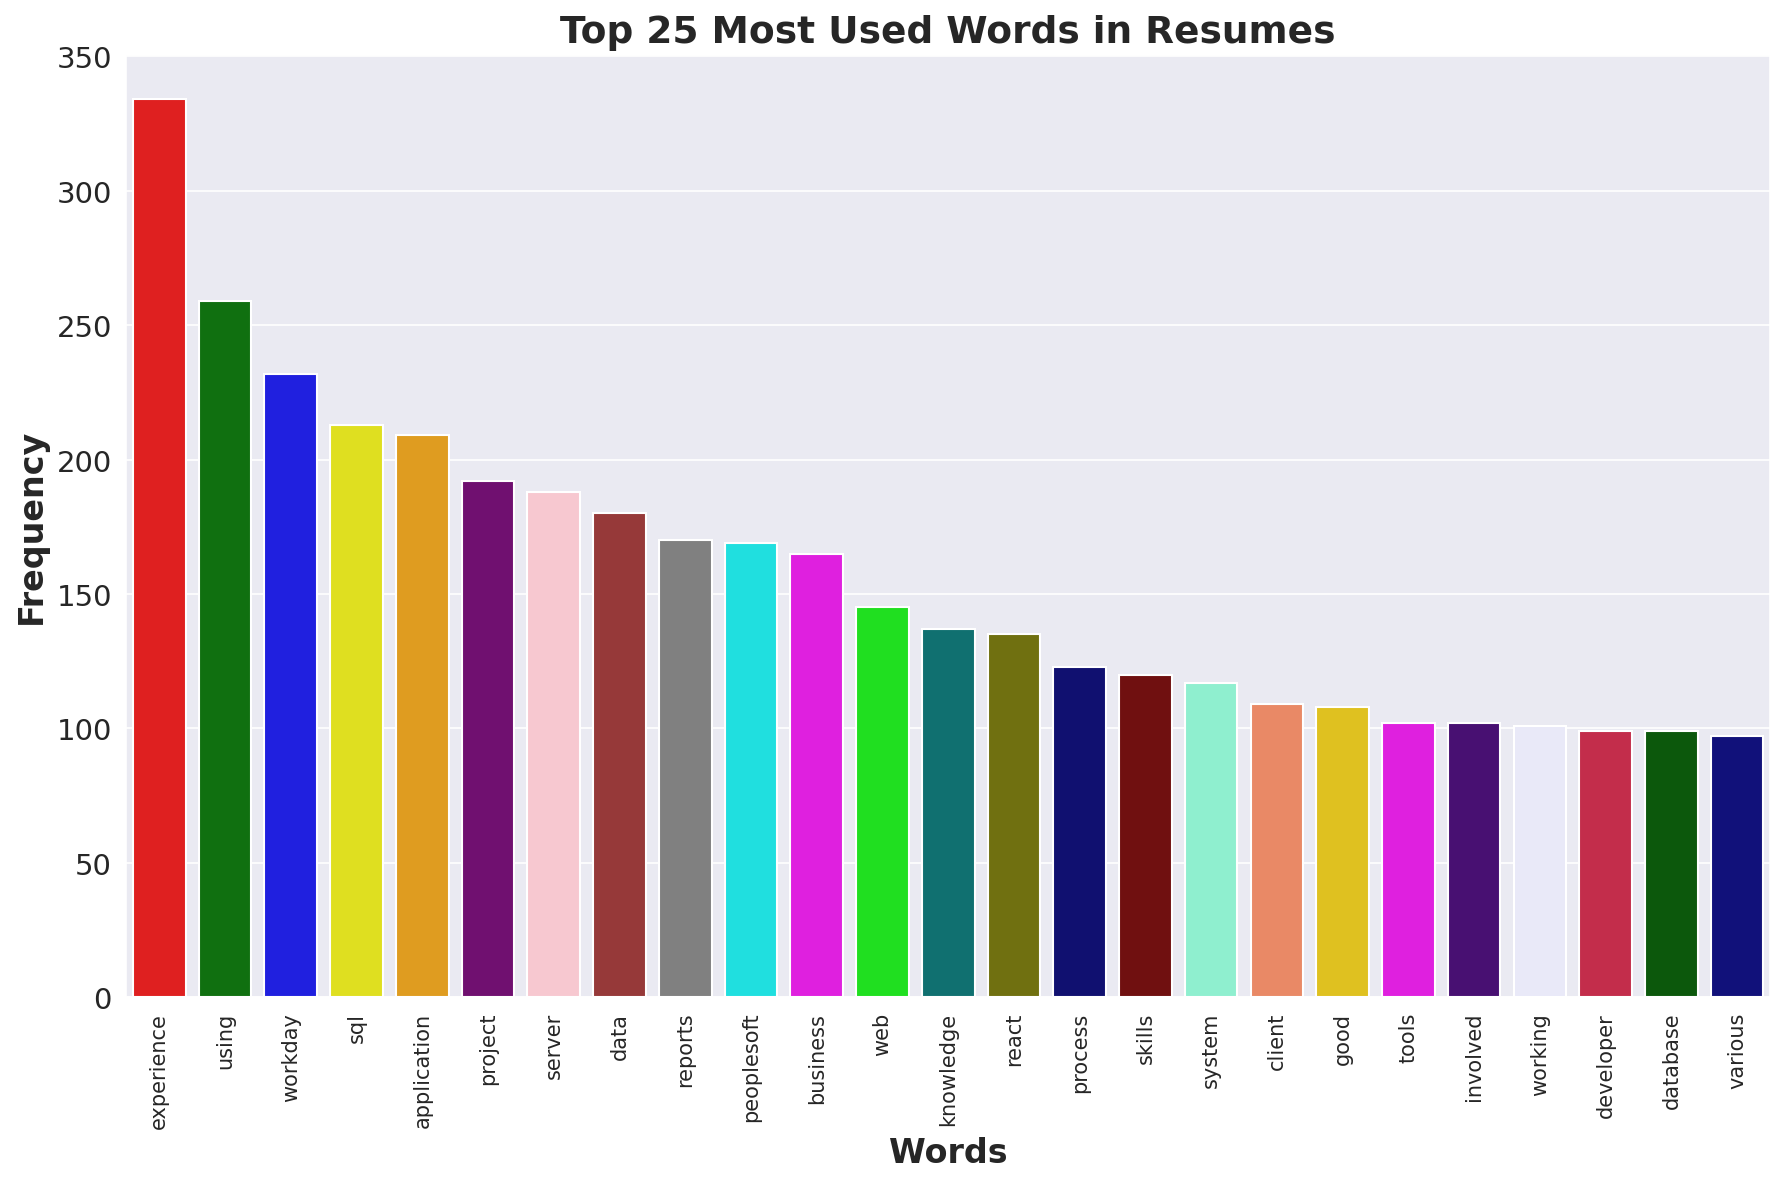

In [68]:
# Top 25 Most used Words in Resumes

fig, axe = plt.subplots(1, 1, figsize=(12, 8), dpi=150)

# Define a list of colors with the desired number of colors
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'lime', 'teal', 'olive', 'navy', 'maroon', 'aquamarine', 'coral', 'gold', 'fuchsia', 'indigo', 'lavender', 'crimson', 'darkgreen', 'darkblue']

ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax=axe, palette=colors)

axe.set_xlabel('Words', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)  # Adjust rotation and fontsize
plt.title('Top 25 Most Used Words in Resumes', fontsize=18, fontweight='bold')  # Add title
fig.tight_layout()
plt.show()

# 5.4 Using the Word Clowds


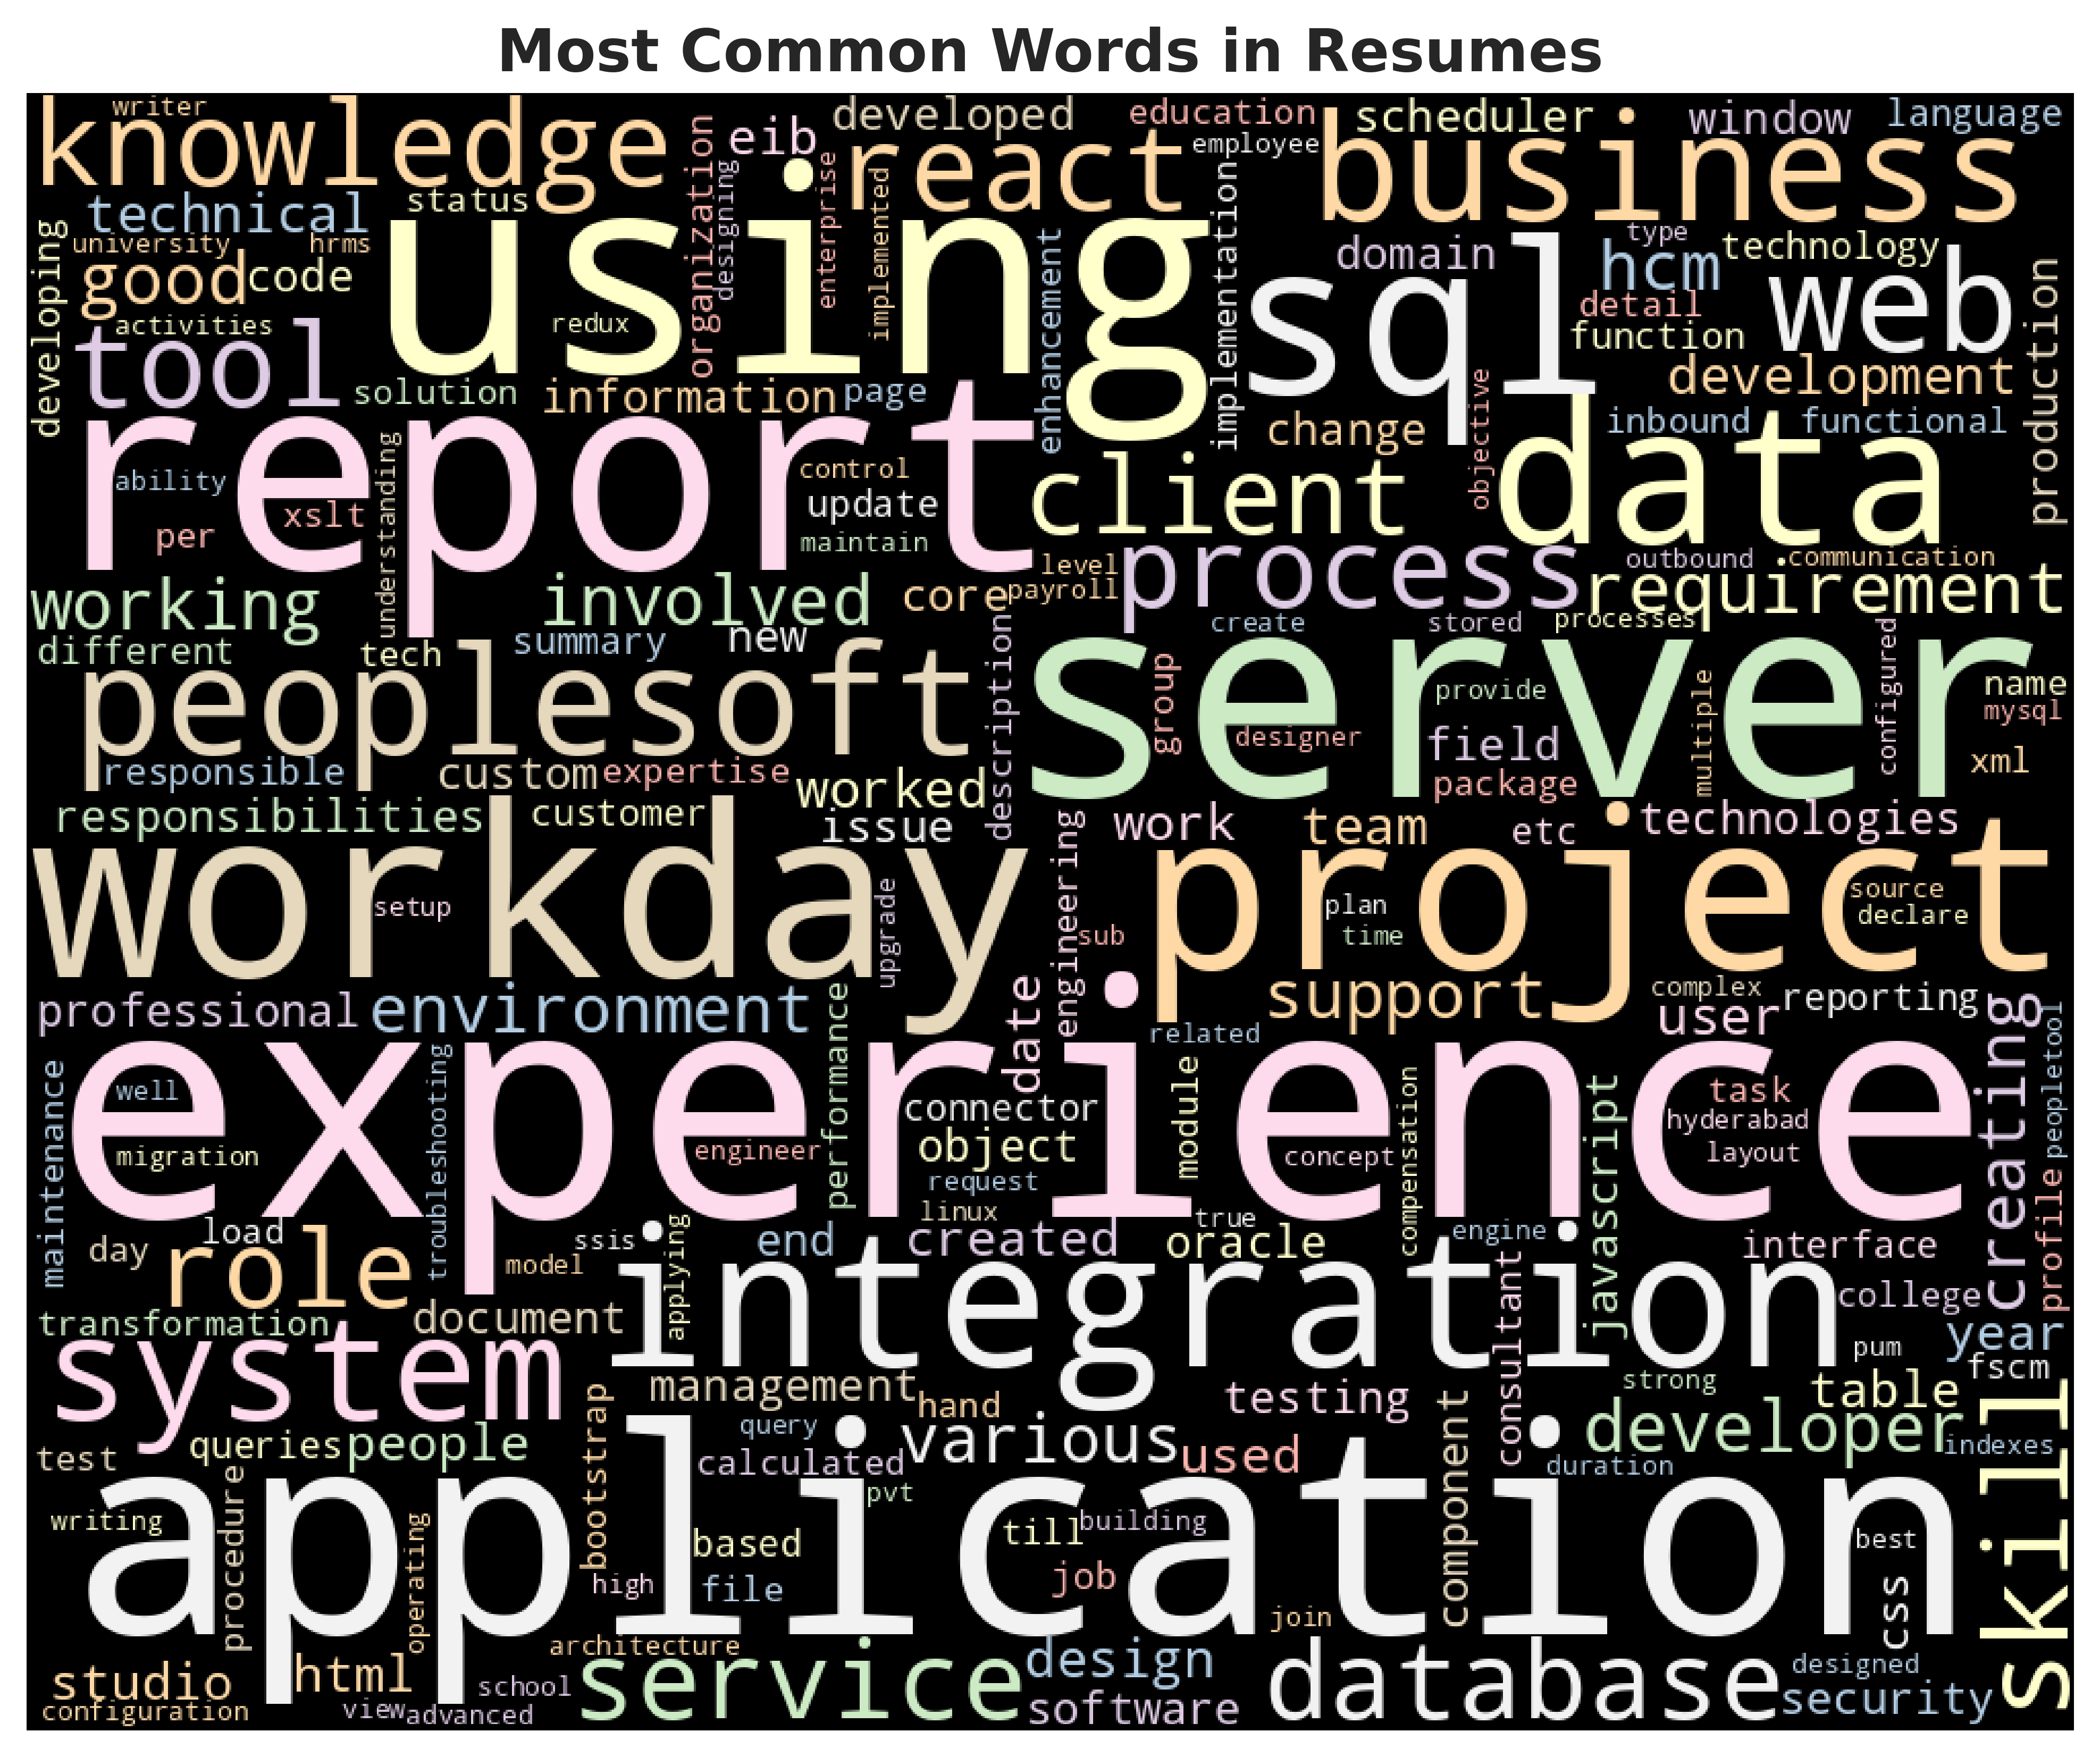

In [69]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# **Text Extraction And EDA COMPLETED**